In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [4]:
cab_price = pd.read_csv(r'C:\Users\karthikp\Downloads\Inceptors\Preprocessing files\Cabs_Prices.csv')
cab_price[:10]

,miles,temp,rain,ncabs,price
0,1,30,0,10,20
1,1,38,0,5,40
2,1,25,0,1,50
3,1,20,1,10,50
4,1,15,1,4,80
5,1,10,1,2,200
6,2,30,0,10,30
7,2,38,0,5,50
8,2,25,0,1,90
9,2,20,1,10,90


In [5]:
cab_price.dtypes

miles    int64
temp     int64
rain     int64
ncabs    int64
price    int64
dtype: object

In [7]:
cab_price.describe().T

,count,mean,std,min,25%,50%,75%,max
miles,60.0,3.000000,1.426148,1.0,2.0,3.0,4.00,5.0
temp,60.0,23.350000,9.166677,10.0,15.0,21.0,30.00,39.0
rain,60.0,0.500000,0.504219,0.0,0.0,0.5,1.00,1.0
ncabs,60.0,5.416667,3.632675,1.0,2.0,4.5,10.00,11.0
price,60.0,157.683333,119.883629,20.0,80.0,123.5,200.25,555.0


In [9]:
cab_price.isnull().sum()

miles    0
temp     0
rain     0
ncabs    0
price    0
dtype: int64

<AxesSubplot:>

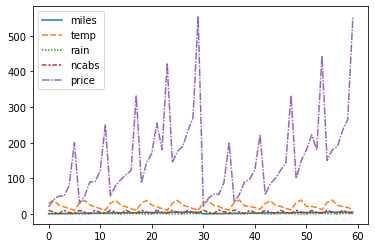

In [12]:
sns.lineplot(data = cab_price)

<AxesSubplot:>

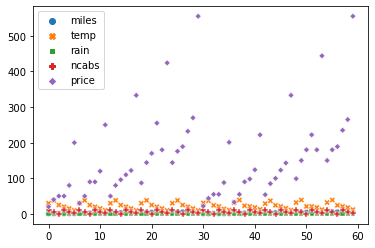

In [16]:
sns.scatterplot(data = cab_price)

<AxesSubplot:>

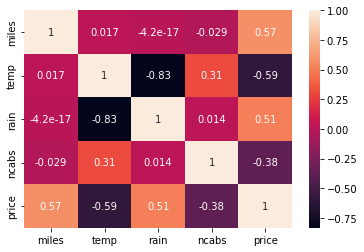

In [40]:
corr = cab_price.corr()
sns.heatmap(data = corr, annot = True )

#### Testing the model with Miles column alone

In [23]:
x1 = cab_price[['miles']]
y1 = cab_price[['price']]

In [33]:
train_x, test_x, train_y, test_y = train_test_split(x1,y1, test_size=0.3, random_state = 3)

In [34]:
model = LinearRegression()

In [35]:
model.fit (train_x, train_y)

LinearRegression()

In [36]:
model.coef_

array([[53.98780488]])

In [37]:
model.intercept_

array([1.53658537])

#### Training the model with complete data

In [43]:
x = cab_price.drop(columns = 'price')
x.head()

,miles,temp,rain,ncabs
0,1,30,0,10
1,1,38,0,5
2,1,25,0,1
3,1,20,1,10
4,1,15,1,4


In [44]:
y = cab_price.iloc[:,-1]
y.head()

0    20
1    40
2    50
3    50
4    80
Name: price, dtype: int64

In [47]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25, random_state=2)

In [48]:
model = LinearRegression()

In [50]:
model.fit(train_x, train_y)

LinearRegression()

In [52]:
train_pred = model.predict(train_x)

In [55]:
train_mse = mean_squared_error(train_y, train_pred)
train_mse

3714.7377392024105

In [57]:
train_mae = mean_absolute_error (train_y, train_pred)
train_mae

43.8328583771956

In [59]:
train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
train_rmse

60.948648378798445

In [60]:
train_mape = mean_absolute_percentage_error(train_y, train_pred)
train_mape

0.33246881703686015

In [61]:
test_pred = model.predict(test_x)

In [63]:
test_mse = mean_squared_error(test_y, test_pred)
test_mse

4286.620247135515

In [64]:
test_mae = mean_absolute_error ( test_y, test_pred)
test_mae

57.441694300281675

In [65]:
test_rmse = np.sqrt(mean_squared_error(test_y, test_pred))
test_rmse

65.47228609981107

In [68]:
test_mape = mean_absolute_percentage_error(test_y, test_pred)
test_mape

1.0666156748697972

In [69]:
train_mse, train_mae, train_rmse, train_mape

(3714.7377392024105, 43.8328583771956, 60.948648378798445, 0.33246881703686015)

In [70]:
test_mse, test_mae, test_rmse, test_mape

(4286.620247135515, 57.441694300281675, 65.47228609981107, 1.0666156748697972)